# Neural Network

In [1]:
import operator
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# this allows plots to appear directly in the notebook %matplotlib inline
import os, sys
import random
import sklearn

from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
#from sklearn import cross_validation

In [2]:
data = pd.read_csv('C:\\Users\\Krina Thakkar\\featureEng.csv')

In [3]:
train, test = train_test_split(data, test_size=0.2)

In [4]:
x = train[['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months']]
y = train['int_rate']
test_x = test[['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months']]
test_y = test['int_rate']

In [5]:
# Neural Network MLPRegressor
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', MLPRegressor(hidden_layer_sizes=(10,),  activation='tanh', solver='lbfgs',alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08))
]

pipeline = Pipeline(steps)

pipeline.fit(x,y)

print('Training score: {}'.format(pipeline.score(x,y)))
print('Test score: {}'.format(pipeline.score(test_x,test_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Training score: 0.9946049633883214


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Test score: 0.9947186587761866


In [8]:
y_train_predicted = pipeline.predict(x)
y_test_predicted = pipeline.predict(test_x)
print('Neural Net','mean_absolute_percent_error train :',np.mean(np.abs((y - y_train_predicted) / y)) * 100)
print('Neural Net','mean_absolute_percent_error test :',np.mean(np.abs((test_y - y_test_predicted) / test_y)) * 100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Neural Net mean_absolute_percent_error train : 1.7804329651827155
Neural Net mean_absolute_percent_error test : 1.7886905873261165


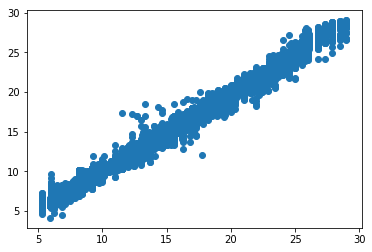

In [9]:
plt.scatter(test_y,y_test_predicted)

# 5 fold cross validation in NN

In [ ]:
kf = KFold(n_splits=5)
dataset = data.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months','int_rate']]
#Seperating dependent and independent variables
X_dash = dataset.iloc[:,:-1]
y1 = dataset.iloc[:,-1:]
accuracy = []
KFold(n_splits=5,shuffle=False)
for train_index, test_index in kf.split(X_dash):
    regressor = MLPRegressor()
    regressor.fit(X_dash.iloc[train_index],y1.iloc[train_index])
    acc = regressor.score(X_dash.iloc[test_index],y1.iloc[test_index])
    accuracy.append(acc)

In [ ]:
print(accuracy)

# Hyper-parameter tuning for Neural Network

In [16]:
# Create hyperparameter space
max_iter = [5,10,100] # no. of epoch
solver = ['lbfgs', 'adam'] # optimizers
learning_rate = ['constant', 'invscaling', 'adaptive'] # learning rate

# Create hyperparameter options
hyperparameters = dict(solver=solver, learning_rate=learning_rate)

In [ ]:
# Create a based model
mlp = MLPRegressor()

# Create grid search
grid = GridSearchCV(estimator=mlp, param_grid=hyperparameters, cv=5)

# Fit grid search
grid_result = grid.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(grid_result.best_params_)